
# Diseño de software para cómputo científico

----

## Unidad 3: Persistencia de datos.


### Agenda de la Unidad 3
---

#### Clase 1
- Lectura y escritura de archivos.
- Persistencia de binarios en Python (pickle).
- Archivos INI/CFG, CSV, JSON, XML y YAML

#### Clase 2
- Bases de datos relacionales y SQL.

### Clase 3

- Formato HDF5.
- Breve repaso de bases de datos No relacionales.

## Lectura y escritura de archivos

- Python ofrece los objetos para la interacción con archivos de texto dentro del módulo `io`.
- Para crear abrir un archivo se utiliza la función `open()`.

In [1]:
try:
    fp = open("code/archivo.txt")
    fp.read()
finally:
    if not fp.closed:
        fp.close()    

In [2]:
with open("code/archivo.txt") as fp:
    fp.read()

## Lectura y escritura de archivos

- Por defecto `open()`abre los archivos en modo lectura (`r`), y con encoding `utf-8`

In [3]:
open("code/archivo.txt")

<_io.TextIOWrapper name='code/archivo.txt' mode='r' encoding='UTF-8'>

<small>
<code>
========= ===============================================================
Character Meaning
--------- ---------------------------------------------------------------
'r'       open for reading (default)
'w'       open for writing, truncating the file first
'x'       create a new file and open it for writing
'a'       open for writing, appending to the end of the file if it exists
'b'       binary mode
't'       text mode (default)
'+'       open a disk file for updating (reading and writing)
'U'       universal newline mode (deprecated)
========= ===============================================================
</code>
</small>

### Pickle

- El módulo pickle implementa protocolos binarios para serializar y deserializar una estructura de objeto Python.
- Esencialmente lo que hace es guardar estado.
- No puede serializar clases generadas dinámicamente

In [4]:
class Persona(): pass

p = Persona()
obj = {"Hola": "Mundo", "Un-Objecto": p}

In [5]:
import pickle

pickle.dumps(obj)

b'\x80\x03}q\x00(X\x04\x00\x00\x00Holaq\x01X\x05\x00\x00\x00Mundoq\x02X\n\x00\x00\x00Un-Objectoq\x03c__main__\nPersona\nq\x04)\x81q\x05u.'

### Pickle

Hay 4 APIS importantes 

1. `load`: Lee de un archivo
2. `loads`: Lee de un string
3. `dump`: Escribe a un archivo 
4. `dumps`: Retorna un string

Los archivos se abren en formato binario (`open("...", mode="b")`)

### CSV

- Los archivos CSV (del inglés comma-separated values) son un tipo de documento en formato abierto sencillo para representar datos en forma de tabla, en las que las columnas se separan por comas (o cualquier otro caracter)
- El formato CSV es muy sencillo y no indica un juego de caracteres concreto.
- **NO ES UN ESTANDAR Y DEBE SER EVITADO**

Librerías utiles para tratar estos formatos son:

- Pandas (`pd.from_csv`)
- csv (en la biblioteca estandar)

### CSV - csv

In [6]:
import csv

with open("code/archivo.csv", encoding="utf-16") as fp:
    for row in csv.reader(fp, delimiter=";"):
        print(row)

['Columna 1,Columna ñ,Columna 3']
['1,2,Hola']
['3,5,mundo']


### CSV - Pandas

In [7]:
import pandas as pd

In [8]:
pd.read_csv("code/archivo.csv", encoding="utf-16")

,Columna 1,Columna ñ,Columna 3
0,1,2,Hola
1,3,5,mundo


## Archivos `ini`/`cfg`

- .ini es una extensión de archivo para denotar ficheros de configuración utilizados por aplicaciones de los sistemas operativos Windows y ciertas aplicaciones en ambiente GNU/Linux.
- El término proviene de "Windows Initialization file", es decir, archivo de inicialización de Windows.
- Actualmente esta en desuso en Windows pero es útil en ambientes con mejores políticas de seguridad como Linux/OSX/Unix
- Loa archivos `ini` se estructuran en:
    - **Secciones:** permiten agrupar parámetros relacionados. Por ejemplo: "Parámetros de red".
    - **Valores:** definen parámetros y su valor. Primero se define el nombre del parámetro y después su valor separado por el signo de igualdad (=).
    - **Comentarios:** permiten explicar el propósito de una sección o parámetro. Los comentarios comienzan con el carácter punto y coma (;).


## Archivos `ini`/`cfg`

```ini

[Red]
; Poner UsarProxy=1 si no hay cortafuegos
UsarProxy=1
Proxy=192.168.0.1

[Preferencias]
PaginaInicio=https://wikipedia.org
Maximizar=1
```

## Archivos `ini`/`cfg`

In [9]:
import configparser

cfg = configparser.ConfigParser()

cfg.read_string("""[Red]
; Poner UsarProxy=1 si no hay cortafuegos
UsarProxy=1
Proxy=192.168.0.1

[Preferencias]
PaginaInicio=https://wikipedia.org
Maximizar=1""")

In [10]:
print(cfg.sections())
cfg["Red"].getint("UsarProxy")

['Red', 'Preferencias']


1

In [11]:
cfg.read_string("""[Otro]
foo=23.9""")
cfg["Otro"].getfloat("foo")

23.9

## Extensible Markup Language - XML

- Es un meta-lenguaje que permite definir lenguajes de marcas desarrollado por el World Wide Web Consortium (W3C) utilizado para almacenar datos en forma legible. 
- Establece su codificación en la cabecera.
- Es un bicho grande y muy extensible.
- Tiene un formato de validación llamado DTD.

### Ejemplo XML

```xml
<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE Edit_Mensaje SYSTEM "Edit_Mensaje.dtd">

<Edit_Mensaje>
     <Mensaje id="1">
          <Remitente>
               <Nombre>Nombre del remitente</Nombre>
               <Mail format="email"> Correo del remitente </Mail>
          </Remitente>
          <Destinatario>
               <Nombre>Nombre del destinatario</Nombre>
               <Mail format="email">Correo del destinatario</Mail>
          </Destinatario>
          <Texto>
               <Asunto>
                    Este es mi documento con una estructura muy sencilla 
                    no contiene atributos ni entidades...
               </Asunto>
               <Parrafo>
                    Este es mi documento con una estructura muy sencilla 
                    no contiene atributos ni entidades...
               </Parrafo>
          </Texto>
     </Mensaje>
</Edit_Mensaje>
```

In [25]:
xml = """
<Edit_Mensaje>
     <Mensaje id="1">
          <Remitente>
               <Nombre>Nombre del remitente</Nombre>
               <Mail format="email"> Correo del remitente </Mail>
          </Remitente>
          <Destinatario>
               <Nombre>Nombre del destinatario</Nombre>
               <Mail format="email">Correo del destinatario</Mail>
          </Destinatario>
          <Texto>
               <Asunto>
                    Este es mi documento con una estructura muy sencilla 
                    no contiene atributos ni entidades...
               </Asunto>
               <Parrafo>
                    Este es mi documento con una estructura muy sencilla 
                    no contiene atributos ni entidades...
               </Parrafo>
          </Texto>
     </Mensaje>
</Edit_Mensaje>"""

### XML

Hay muchas formas y paradigmas totalmente diferentes para leer archivos XML. Vamos a ver tres simples

In [26]:
from xml.etree import ElementTree

In [27]:
tree = ElementTree.fromstring(xml)

In [28]:
for msg in tree.findall("Mensaje"):
    for part in msg:
        for children in part:
            print(children.tag)
            print(children.text)
            print(children.attrib)
            print("-" * 10)

Nombre
Nombre del remitente
{}
----------
Mail
 Correo del remitente 
{'format': 'email'}
----------
Nombre
Nombre del destinatario
{}
----------
Mail
Correo del destinatario
{'format': 'email'}
----------
Asunto

                    Este es mi documento con una estructura muy sencilla 
                    no contiene atributos ni entidades...
               
{}
----------
Parrafo

                    Este es mi documento con una estructura muy sencilla 
                    no contiene atributos ni entidades...
               
{}
----------


### Pyquery

- Implementa un mecanismo de busqueda tipo base de datos sobre XML.
- Es un port de la librería Jquery de Javascript.
- Esta implementado sobre un ElemeTree muy eficiente llamado `lxml`

Se instala con `pip install pyquery`

In [29]:
import pyquery as pq
d = pq.PyQuery(xml, parser='xml')

In [36]:
d("Mensaje#1")

[<Mensaje#1>]

## JSON - Javascript Simple Object Notation

- Aprovechar comportamiento comun de todos los lenguajes de programación.
- Se trata de un subconjunto de la notación literal de objetos de JavaScript, aunque, debido a su amplia adopción como alternativa a XML, se considera (año 2019) un formato independiente del lenguaje.
- JSON es **UTF-8**

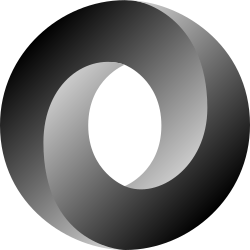

## Los tipos de datos disponibles con JSON son:

- Números: Se permiten números negativos y opcionalmente pueden contener parte fraccional separada por puntos. Ejemplo: `123.456`
- Cadenas: Representan secuencias de cero o más caracteres. Se ponen entre doble comilla y se permiten cadenas de escape. Ejemplo: `"Hola"`
- Booleanos: Representan valores booleanos y pueden tener dos valores: `true` y `false`
- `null`: Representan el valor nulo.
- Array: Representa una lista ordenada de cero o más valores los cuales pueden ser de cualquier tipo. Los valores se separan por comas y el vector se mete entre corchetes. Ejemplo `["juan","pedro","jacinto"]`
- Objetos: Son colecciones no ordenadas de pares de la forma <nombre>:<valor> separados por comas y puestas entre llaves. Ejemplo: `{"hola": ["Mundo", 1]}`

### JSON - Ejemplo

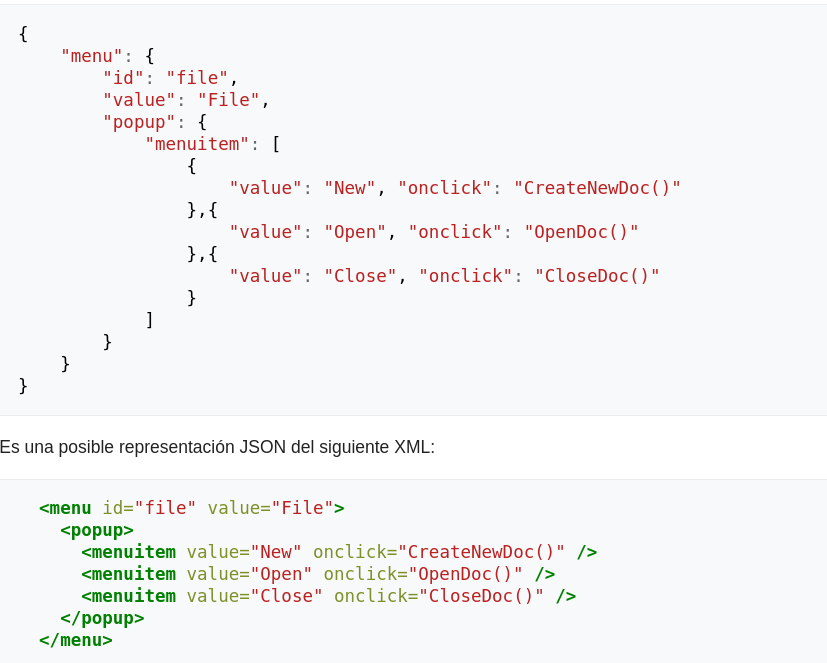

### JSON - Ejemplo

In [59]:
src = """{
  "menu": {
    "id": "file",
    "value": "File",
    "popup": {
        "menuitem": [
            {"value": "New", "onclick": "CreateNewDoc()"},
            {"value": "Open", "onclick": "OpenDoc()"},
            {"value": "Close", "onclick": "CloseDoc()"}]}}}"""

In [60]:
import json

json.loads(src)

{'menu': {'id': 'file',
  'value': 'File',
  'popup': {'menuitem': [{'value': 'New', 'onclick': 'CreateNewDoc()'},
    {'value': 'Open', 'onclick': 'OpenDoc()'},
    {'value': 'Close', 'onclick': 'CloseDoc()'}]}}}

In [61]:
json.dumps({"hola": True})

'{"hola": true}'

## YAML - YAML Ain't Markup Language

- Es un superset de json (Osea un parser YAML lee JSON)
- Es "menos" estandar.
- Pero soporta comentarios!
- Soporta texto multilinea
- Persiste objetos arbitrarios Python (OJO).
- `pip install PyYAML`

### Todo esto es YAML

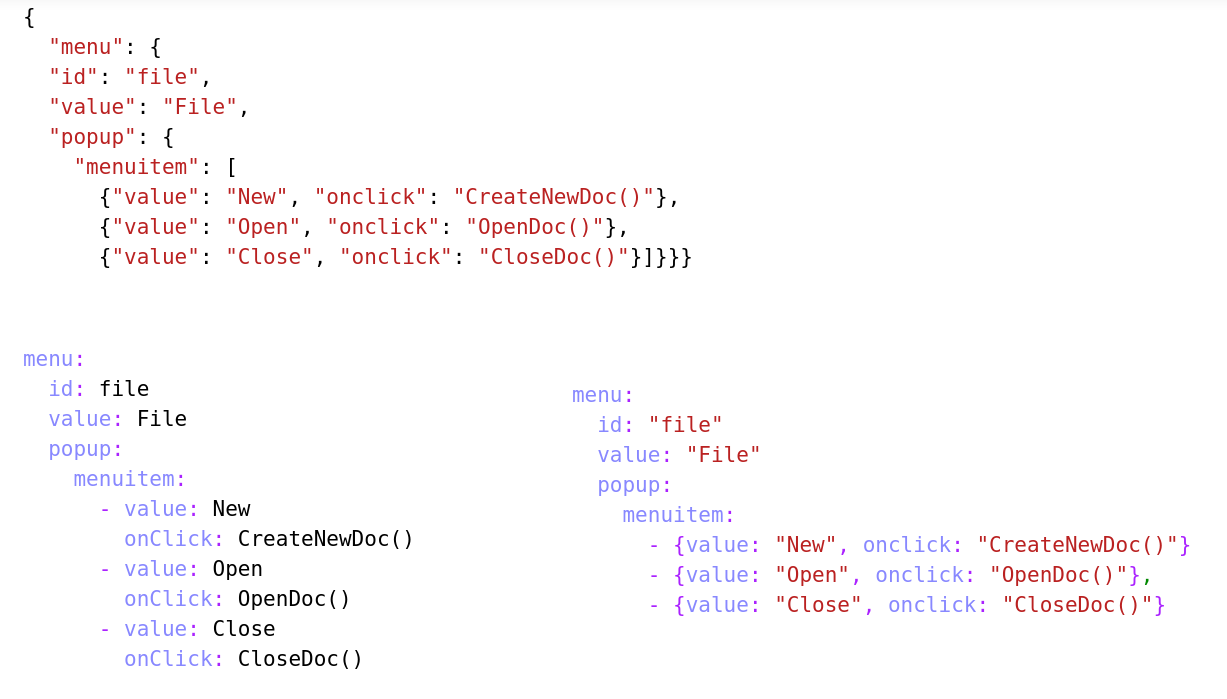

### Parseando YAML - JSON

In [62]:
import yaml

In [77]:
yaml.safe_load("""
{
  "menu": {
  "id": "file",
  "value": "File",
  "popup": {
    "menuitem": [
      {"value": "New", "onclick": "CreateNewDoc()"},
      {"value": "Open", "onclick": "OpenDoc()"},
      {"value": "Close", "onclick": "CloseDoc()"}]}}}""")

{'menu': {'id': 'file',
  'value': 'File',
  'popup': {'menuitem': [{'value': 'New', 'onclick': 'CreateNewDoc()'},
    {'value': 'Open', 'onclick': 'OpenDoc()'},
    {'value': 'Close', 'onclick': 'CloseDoc()'}]}}}

### Parseando YAML - YAML PURO

In [76]:
yaml.safe_load("""
menu:
  id: file
  value: File
  popup:
    menuitem:
      - value: New
        onClick: CreateNewDoc()
      - value: Open
        onClick: OpenDoc()
      - value: Close
        onClick: CloseDoc()""")

{'menu': {'id': 'file',
  'value': 'File',
  'popup': {'menuitem': [{'value': 'New', 'onClick': 'CreateNewDoc()'},
    {'value': 'Open', 'onClick': 'OpenDoc()'},
    {'value': 'Close', 'onClick': 'CloseDoc()'}]}}}

### Parseando YAML - Hibrido y dump

In [74]:
yaml.safe_load("""
menu:
  id: "file"      
  value: "File"
  popup:
    menuitem:
      - {value: "New", onclick: "CreateNewDoc()"}
      - {value: "Open", onclick: "OpenDoc()"}
      - {value: "Close", onclick: "CloseDoc()"}
      
""")

{'menu': {'id': 'file',
  'value': 'File',
  'popup': {'menuitem': [{'value': 'New', 'onclick': 'CreateNewDoc()'},
    {'value': 'Open', 'onclick': 'OpenDoc()'},
    {'value': 'Close', 'onclick': 'CloseDoc()'}]}}}

In [79]:
import attr

@attr.s
class Persona:
    name = attr.ib()

yaml.dump({"hola": Persona(name="Tito")})

'hola: !!python/object:__main__.Persona\n  name: Tito\n'